In [3]:
import requests
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as scipy

fifa_url = 'https://worldcup.sfg.io/teams/results'


In [4]:
#request data on all the teams in the 2018 World cup
response = requests.get(fifa_url).json()
teams_df = pd.DataFrame(response)
teams_df.index = teams_df['country']
del teams_df['alternate_name']
teams_df.head()


,country,draws,fifa_code,games_played,goal_differential,goals_against,goals_for,group_id,group_letter,id,losses,points,wins
country,,,,,,,,,,,,,
Korea Republic,Korea Republic,0,KOR,3,0,3,3,6,F,24,2,3,1
Germany,Germany,0,GER,3,-2,4,2,6,F,21,2,3,1
Serbia,Serbia,0,SRB,3,-2,4,2,5,E,20,2,3,1
Costa Rica,Costa Rica,1,CRC,3,-3,5,2,5,E,19,2,1,0
Belgium,Belgium,0,BEL,7,10,6,16,7,G,25,1,18,6


In [5]:
matches_url = 'https://worldcup.sfg.io/matches'
match_df = pd.DataFrame(requests.get(matches_url).json())
match_df

,attendance,away_team,away_team_country,away_team_events,away_team_statistics,datetime,fifa_id,home_team,home_team_country,home_team_events,...,last_score_update_at,location,officials,stage_name,status,time,venue,weather,winner,winner_code
0,78011,"{'country': 'Saudi Arabia', 'code': 'KSA', 'go...",Saudi Arabia,"[{'id': 12, 'type_of_event': 'substitution-in'...","{'country': 'Saudi Arabia', 'attempts_on_goal'...",2018-06-14T15:00:00Z,300331503,"{'country': 'Russia', 'code': 'RUS', 'goals': ...",Russia,"[{'id': 5, 'type_of_event': 'goal', 'player': ...",...,None,Luzhniki Stadium,"[Nestor PITANA, Hernan MAIDANA, Juan Pablo BEL...",First stage,completed,full-time,Moscow,"{'humidity': '43', 'temp_celsius': '17', 'temp...",Russia,RUS
1,27015,"{'country': 'Uruguay', 'code': 'URU', 'goals':...",Uruguay,"[{'id': 15, 'type_of_event': 'substitution-in'...","{'country': 'Uruguay', 'attempts_on_goal': 14,...",2018-06-15T12:00:00Z,300353632,"{'country': 'Egypt', 'code': 'EGY', 'goals': 0...",Egypt,"[{'id': 14, 'type_of_event': 'substitution-in'...",...,None,Ekaterinburg Arena,"[Bjorn KUIPERS, Sander VAN ROEKEL, Erwin ZEINS...",First stage,completed,full-time,Ekaterinburg,"{'humidity': '42', 'temp_celsius': '14', 'temp...",Uruguay,URU
2,62548,"{'country': 'Iran', 'code': 'IRN', 'goals': 1,...",Iran,"[{'id': 22, 'type_of_event': 'yellow-card', 'p...","{'country': 'Iran', 'attempts_on_goal': 8, 'on...",2018-06-15T15:00:00Z,300331526,"{'country': 'Morocco', 'code': 'MAR', 'goals':...",Morocco,"[{'id': 23, 'type_of_event': 'yellow-card', 'p...",...,None,Saint Petersburg Stadium,"[Cuneyt CAKIR, Bahattin DURAN, Tarik ONGUN, Se...",First stage,completed,full-time,St. Petersburg,"{'humidity': '37', 'temp_celsius': '25', 'temp...",Iran,IRN
3,43866,"{'country': 'Spain', 'code': 'ESP', 'goals': 3...",Spain,"[{'id': 37, 'type_of_event': 'yellow-card', 'p...","{'country': 'Spain', 'attempts_on_goal': 12, '...",2018-06-15T18:00:00Z,300331524,"{'country': 'Portugal', 'code': 'POR', 'goals'...",Portugal,"[{'id': 36, 'type_of_event': 'goal-penalty', '...",...,2018-06-15T19:52:38Z,Fisht Stadium,"[Gianluca ROCCHI, Elenito DI LIBERATORE, Mauro...",First stage,completed,full-time,Sochi,"{'humidity': '74', 'temp_celsius': '24', 'temp...",Draw,Draw
4,41279,"{'country': 'Australia', 'code': 'AUS', 'goals...",Australia,"[{'id': 50, 'type_of_event': 'yellow-card', 'p...","{'country': 'Australia', 'attempts_on_goal': 4...",2018-06-16T10:00:00Z,300331533,"{'country': 'France', 'code': 'FRA', 'goals': ...",France,"[{'id': 52, 'type_of_event': 'goal-penalty', '...",...,2018-06-16T11:52:21Z,Kazan Arena,"[Andres CUNHA, Nicolas TARAN, Mauricio ESPINOS...",First stage,completed,full-time,Kazan,"{'humidity': '32', 'temp_celsius': '19', 'temp...",France,FRA
5,44190,"{'country': 'Iceland', 'code': 'ISL', 'goals':...",Iceland,"[{'id': 63, 'type_of_event': 'goal', 'player':...","{'country': 'Iceland', 'attempts_on_goal': 9, ...",2018-06-16T13:00:00Z,300331515,"{'country': 'Argentina', 'code': 'ARG', 'goals...",Argentina,"[{'id': 62, 'type_of_event': 'goal', 'player':...",...,2018-06-16T14:54:29Z,Spartak Stadium,"[Szymon MARCINIAK, Pawel SOKOLNICKI, Tomasz LI...",First stage,completed,full-time,Moscow,"{'humidity': '33', 'temp_celsius': '22', 'temp...",Draw,Draw
6,40502,"{'country': 'Denmark', 'code': 'DEN', 'goals':...",Denmark,"[{'id': 70, 'type_of_event': 'substitution-in'...","{'country': 'Denmark', 'attempts_on_goal': 10,...",2018-06-16T16:00:00Z,300331528,"{'country': 'Peru', 'code': 'PER', 'goals': 0,...",Peru,"[{'id': 71, 'type_of_event': 'yellow-card', 'p...",...,2018-06-16T16:55:28Z,Mordovia Arena,"[Bakary GASSAMA, Jean Claude BIRUMUSHAHU, Abde...",First stage,completed,full-time,Saransk,"{'humidity': '48', 'temp_celsius': '18', 'temp...",Denmark,DEN
7,31136,"{'country': 'Nigeria', 'code': 'NGA', 'goals':...",Nigeria,"[{'id': 81, 'type_of_event': 'goal-own', 'play...","{'country': 'Nigeria', 'attempts_on_goal': 14,...",2018-06-16T19:00:00Z,300331523,"{'country': 'Croati

In [6]:
#goal_times = {}
goal_times_dict = {
    'First stage':{},
    'Round of 16':{},
    'Quarter-finals': {},
    'Semi-finals': {},
    'Play-off for third place':{},
    'Final':{} 
}

stage_wins_dict = {
    'First stage':{},
    'Round of 16':{},
    'Quarter-finals': {},
    'Semi-finals': {},
    'Play-off for third place':{},
    'Final':{} 
}

stage_tactics = {
    'First stage':{},
    'Round of 16':{},
    'Quarter-finals': {},
    'Semi-finals': {},
    'Play-off for third place':{},
    'Final':{} 
}

for index, match in match_df.iterrows():
    
    home = match['home_team_country']
    away = match['away_team_country']
    winner = match['winner']
    if (winner == home):
        loser = away
    else:
        loser = home
    stage = match['stage_name']
    home_event = match['home_team_events']
    away_event = match['away_team_events']
    team_events = [home_event, away_event]
    #team_stats = [match['home_team_statistics'], match['away_team_statistics']]
    teams = [home, away]
    goal_times = goal_times_dict[stage]
    
    #determine winner
    if winner in stage_wins_dict[stage]:
        stage_wins_dict[stage][winner] += 1
    else:
        stage_wins_dict[stage][winner] = 1
    #add loser data 
    if loser not in stage_wins_dict[stage]:
        stage_wins_dict[stage][loser] = 0
    else:
        continue
    #get tactics, sort by stage
   # for stats in team_stats:
   #     team = teams[team_stats.index(stats)]
    #    tactic = stats['tactics']
    #grab goal times in team_events
    for events in team_events:
        team = teams[team_events.index(events)]

        for event in events: 
            #normal goals
            if (event['type_of_event'] == 'goal'):
                time = event['time']
                time = time.replace("'", "")
                try:
                    time = int(time)
                except:
                    time = eval(time)
                
                if team in goal_times:
                    goal_times[team].append(time)  
                else:
                    goal_times[team] = []
                    goal_times[team].append(time)
            #penalties       
            elif(event['type_of_event'] == 'goal-penalty'):
                time = event['time']
                time = time.replace("'", "")
                try:
                    time = int(time)
                except:
                    time = eval(time) 
                
                if team in goal_times:
                    goal_times[team].append(time)
                else:
                    goal_times[team] = []
                    goal_times[team].append(time)
            else:
                continue
            #add first goal of the game to dictionary
# stage in goal_times_dict:
 
    #for country in goal_times_dict[stage]:
     #   goal_times_means.loc[country, stage] = np.mean(goal_times_dict[stage][country])


In [7]:
#defining a function that helps me fix lists of lists that I will use later
def flatten(items, seqtypes=(list, tuple)):
    for i, x in enumerate(items):
        while i < len(items) and isinstance(items[i], seqtypes):
            items[i:i+1] = items[i]
    return items

#combining last rounds into one
def finalround(dictionary):
    finalrounds = ['Quarter-finals','Semi-finals', 'Play-off for third place', 'Final']
    combined_dict = {
            'First stage': dictionary['First stage'],
            'Round of 16': dictionary['Round of 16'],
            'Final rounds':{},
        }
    for r in finalrounds:
        for country in dictionary[r]:
            if country not in combined_dict['Final rounds']:
                combined_dict['Final rounds'][country] = dictionary[r][country]
            else:
                entry = combined_dict['Final rounds'][country]
                #if its a list, append it
                try:
                    entry.append(dictionary[r][country])
                #if its a number, add it.
                except:
                    entry += dictionary[r][country]
    try:         
        for country in combined_dict['Final rounds']:
            entry = combined_dict['Final rounds'][country]  
            entry = flatten(entry)
    except:
        pass
    return combined_dict

In [8]:
#defining functions to crunch numbers

#getting points
def points(dictionary):
    points_dict = {}
    keys = list(dictionary.keys())
    for key in keys:
        points_dict[key] = {}
    for stage in points_dict:
        for country in dictionary[stage]:
            points_dict[stage][country] = len(dictionary[stage][country])
    return points_dict

#getting first goals
def first_goal(dictionary):       
    first_goal = {}
    keys = list(dictionary.keys())
    for key in keys:
        first_goal[key] = {}
    for stage in first_goal:
        for country in dictionary[stage]:
            first_goal[stage][country] = min(dictionary[stage][country])
    return first_goal

#getting means
def means(dictionary):
    mean_dict = {}
    keys = list(dictionary.keys())
    for key in keys:
        mean_dict[key] = {}
    for stage in dictionary:
        for country in dictionary[stage]:
            mean_dict[stage][country] = np.mean(dictionary[stage][country])
    return mean_dict



#plotting

def plotstuff(dictionary1, dictionary2):
    for stage in dictionary1:
        x = pd.Series(dictionary1[stage])
        y = pd.Series(dictionary2[stage])
        x = x.dropna(axis=0)
        y = y.dropna(axis=0)
        slope, intercept, r_value, p_value, std_err = scipy.linregress(x, y)
        plt.scatter(x, y)
        z = np.polyfit(x, y, 1)
        p = np.poly1d(z)
        plt.plot(x,p(x),"g--")
        plt.show()
        print(f"R-value: {r_value}, P-value: {p_value})")
        plt.gcf().clear()

{'First stage': {'Russia': 62.2, 'Uruguay': 89.0, 'Portugal': 45.333333333333336, 'Spain': 45.666666666666664, 'France': 69.5, 'Australia': 62.0, 'Argentina': 19.0, 'Iceland': 23.0, 'Denmark': 59.0, 'Croatia': 71.0, 'Serbia': 56.0, 'Mexico': 35.0, 'Brazil': 20.0, 'Switzerland': 50.0, 'Sweden': 65.0, 'Belgium': 63.666666666666664, 'Tunisia': 35.0, 'England': 51.0, 'Colombia': 39.0, 'Japan': 39.5, 'Poland': 86.0, 'Senegal': 60.0, 'Nigeria': 62.0}, 'Round of 16': {'France': 50.5, 'Argentina': 60.666666666666664, 'Uruguay': 34.5, 'Portugal': 55.0, 'Russia': 41.5, 'Croatia': 4.0, 'Denmark': 1.5, 'Brazil': 69.5, 'Belgium': 79.0, 'Japan': 50.0, 'Sweden': 66.0, 'Colombia': 93.0, 'England': 57.5}, 'Final rounds': {'France': 50.42857142857143, 'Brazil': 76.0, 'Belgium': 39.0, 'England': 31.333333333333332, 'Russia': 73.0, 'Croatia': 73.57142857142857}}


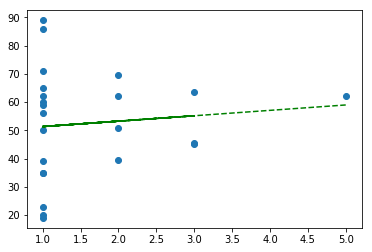

R-value: 0.10447063074705983, P-value: 0.6352254358239177)


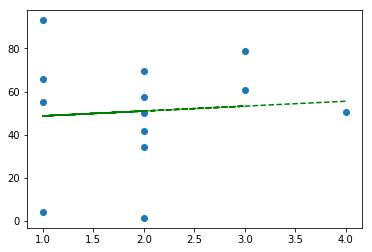

R-value: 0.07872489169137604, P-value: 0.7982275964513174)


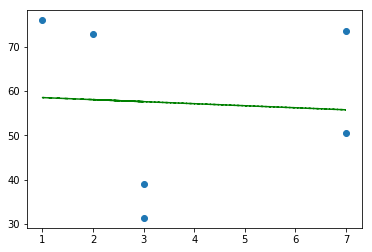

R-value: -0.06022772164386464, P-value: 0.9097676519041277)
{'First stage': {'Russia': 2, 'Saudi Arabia': 1, 'Uruguay': 3, 'Egypt': 0, 'Iran': 1, 'Morocco': 0, 'Draw': 9, 'Portugal': 1, 'France': 2, 'Australia': 0, 'Argentina': 1, 'Denmark': 1, 'Peru': 1, 'Croatia': 3, 'Nigeria': 1, 'Serbia': 1, 'Costa Rica': 0, 'Mexico': 2, 'Germany': 1, 'Brazil': 2, 'Sweden': 2, 'Korea Republic': 1, 'Belgium': 3, 'Panama': 0, 'England': 2, 'Tunisia': 1, 'Japan': 1, 'Colombia': 2, 'Senegal': 1, 'Poland': 1, 'Spain': 1, 'Iceland': 0, 'Switzerland': 1}, 'Round of 16': {'France': 1, 'Argentina': 0, 'Uruguay': 1, 'Portugal': 0, 'Russia': 1, 'Spain': 0, 'Croatia': 1, 'Denmark': 0, 'Brazil': 1, 'Mexico': 0, 'Belgium': 1, 'Japan': 0, 'Sweden': 1, 'Switzerland': 0, 'England': 1, 'Colombia': 0}, 'Final rounds': {'France': 1, 'Uruguay': 0, 'Belgium': 1, 'Brazil': 0, 'England': 1, 'Sweden': 0, 'Croatia': 1, 'Russia': 0}}


<Figure size 432x288 with 0 Axes>

In [9]:

stage_wins_combined = finalround(stage_wins_dict)
goal_times_combined = finalround(goal_times_dict)
#trying out some graphs
combined_means = means(goal_times_combined)
print(combined_means)
points = points(goal_times_combined)
plotstuff(points, combined_means)

print(stage_wins_combined)

In [10]:
#binning based on first stage  mean goal times performance
index = []
bins = []

for country in combined_means['First stage']:
    index.append(country)
    data = combined_means['First stage'][country]
    if(data < 30):
        bins.append('First 30 min')
    elif(data < 60):
        bins.append('Second 30 min')
    elif(data < 90):
        bins.append('Last 30 min')
    else:
        bins.append('Added time')
bins_df = pd.DataFrame(bins, index = index)


bin
First 30 min     2.000000
Last 30 min      4.166667
Second 30 min    1.500000
Name: wins, dtype: float64


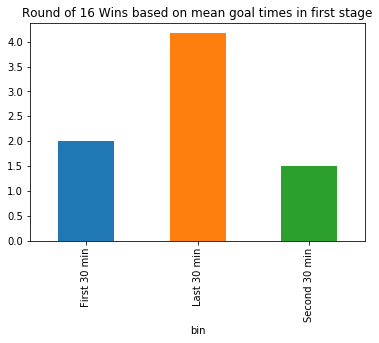

In [11]:

roundof16 = [country for country in stage_wins_combined['Round of 16']]
wins = teams_df['wins']
wins.reindex(index)
bins_df['wins'] = wins
bins_df.columns = ['bin', 'wins']
not16 = [c for c in index if c not in roundof16]
#notfinal = [c for c in index if c not in finalrounds]
r16bins = bins_df.drop(not16)
#finalbins = bins_df.drop(notfinal)
#graph r16bins, finalbins, or total(bins_df)
bins_group = r16bins.groupby('bin')
bins_sum = bins_group['wins'].mean()
print(bins_sum)

bins_sum.plot(kind='bar', title="Round of 16 Wins based on mean goal times in first stage")

In [18]:
#binning based on first stage first goals
first_goals = first_goal(goal_times_combined)

df1 = pd.Series(first_goals['First stage'])
print(df1)
df2 = pd.Series(first_goals['Round of 16'])
df3 = pd.Series(first_goals['Final rounds'])
df4 = pd.concat(df1, df2, df3, ignore_index= True )
df2 = df1.append(first_goals['Round of 16'], ingore_index=True)
df3 = df2.append(first_goals['Final rounds'], ignore_index=True)
print(df3)

index = []
bins = []

for country in first_goals['Final rounds']:
    index.append(country)
    data = first_goals['Final rounds'][country]
    if(data < 30):
        bins.append('First 30 min')
    elif(data < 60):
        bins.append('Second 30 min')
    elif(data < 90):
        bins.append('Last 30 min')
    else:
        bins.append('Added time')
bins_df = pd.DataFrame(bins, index = index)
#print(bins_df)


Russia         12
Uruguay        89
Portugal        4
Spain          24
France         58
Australia      62
Argentina      19
Iceland        23
Denmark        59
Croatia        71
Serbia         56
Mexico         35
Brazil         20
Switzerland    50
Sweden         65
Belgium        47
Tunisia        35
England        11
Colombia       39
Japan           6
Poland         86
Senegal        60
Nigeria        49
dtype: int64


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "Series"

In [1]:
roundof16 = [country for country in stage_wins_combined['Round of 16']]
finalrounds = [country for country in stage_wins_combined['Final rounds']]
wins = teams_df['wins']
wins.reindex(index)
bins_df['wins'] = wins
bins_df.columns = ['bin', 'wins']
not16 = [c for c in index if c not in roundof16]
notfinal = [c for c in index if c not in finalrounds]
r16bins = bins_df.drop(not16)
finalbins = bins_df.drop(notfinal)



#graph r16bins, finalbins, or bins_df
bins_group = finalbins.groupby('bin')
bins_sum = pd.DataFrame(bins_group['wins'].mean())
bins_sum['Colors'] = ""
bins_sum.loc['First 30 min', 'Colors'] = 'g'
bins_sum.loc['Second 30 min', 'Colors'] = 'r'
bins_sum.loc['Last 30 min', 'Colors'] = 'g'


#One-Way ANOVA
last = finalbins.loc[finalbins['bin']=='Last 30 min', :]
second = finalbins.loc[finalbins['bin']=='Second 30 min',:]
first = finalbins.loc[finalbins['bin']=='First 30 min',:]
stats, pvalue = scipy.f_oneway(last['wins'], second['wins'], first['wins'])


plt.style.use('fivethirtyeight')

bins_sum.sort_values(by=['wins'], inplace=True)

plt.barh(bins_sum.index, 
         bins_sum['wins'],
         color=bins_sum.Colors
        )
plt.title("Avg Final Round Wins by First Stage First Goals")
plt.show()
print(f"One-Way ANOVA P-Value:{pvalue}")

NameError: name 'stage_wins_combined' is not defined

In [111]:
winning_fouls_total = 0
losing_fouls_total = 0
foul_avg = {}
for i in np.arange(0,len(match_df)-1):
    
    #grab country names and fouls committed
    winner = match_df.iloc[i,20]
    row = match_df.iloc[i,:]
    home = row['home_team_country']
    away = row['away_team_country']
    home_foul = row['home_team_statistics']['tactics']
    print(home_foul)
    away_foul = row['away_team_statistics']['tactics']
    print(away_foul)
    
    #fix data for none values
    if (home_foul == None):
        home_foul=0
    if (away_foul == None):
        away_foul = 0
        
    #add both foul counts to country totals
    if (home in foul_avg):
        foul_avg[home] += home_foul
    else:
        foul_avg[home] = home_foul
    if (away in foul_avg):
        foul_avg[away] += away_foul
    else:
        foul_avg[away] = away_foul
        
    #add foul counts to winning and losing foul counts
    if (row['home_team_country'] == winner) :
        winning_fouls_total += home_foul
        losing_fouls_total += away_foul
    elif (row['away_team_country'] == winner) :
        winning_fouls_total += away_foul
        losing_fouls_total += home_foul
    else:
        continue
            
    #if theres a draw, dont add to winner count but still add to the country totals      
print(foul_avg)

22
10
12
6
22
14
12
10
16
19
10
15
10
18
20
16
18
15
10
15
12
19
20
23
17
18
14
8
15
9
8
15
11
10
19
23
10
13
14
14
7
5
11
15
15
23
11
11
10
9
17
11
12
13
23
7
12
12
None
None
None
None
None
None
17
18
7
16
5
17
16
11
10
10
13
12
10
12
20
15
16
7
14
11
9
14
13
7
11
8
15
15
11
14
17
19
21
15
12
13
5
19
5
19
6
18
13
9
11
13
23
13
16
15
14
15
10
7
25
18
5
16
22
14
10
5
{'Russia': 95, 'Saudi Arabia': 30, 'Egypt': 38, 'Uruguay': 61, 'Morocco': 62, 'Iran': 44, 'Portugal': 55, 'Spain': 34, 'France': 78, 'Australia': 37, 'Argentina': 55, 'Iceland': 34, 'Peru': 37, 'Denmark': 54, 'Croatia': 100, 'Nigeria': 46, 'Costa Rica': 43, 'Serbia': 45, 'Germany': 29, 'Mexico': 54, 'Brazil': 50, 'Switzerland': 52, 'Sweden': 64, 'Korea Republic': 62, 'Belgium': 97, 'Panama': 35, 'Tunisia': 46, 'England': 58, 'Colombia': 53, 'Japan': 29, 'Poland': 16, 'Senegal': 30}


In [110]:


games_won = []
#calculate average fouls based on foul dictionary
for country in teams_df['country']:
    games = teams_df.loc[country, 'games_played']
    foul_avg[country] = foul_avg[country]/games
    won = teams_df.loc[country, 'points']
    games_won.append(won)
print(foul_avg)

{'Russia': 19.0, 'Saudi Arabia': 10.0, 'Egypt': 12.666666666666666, 'Uruguay': 12.2, 'Morocco': 20.666666666666668, 'Iran': 14.666666666666666, 'Portugal': 13.75, 'Spain': 8.5, 'France': 11.142857142857142, 'Australia': 12.333333333333334, 'Argentina': 13.75, 'Iceland': 11.333333333333334, 'Peru': 12.333333333333334, 'Denmark': 13.5, 'Croatia': 14.285714285714286, 'Nigeria': 15.333333333333334, 'Costa Rica': 14.333333333333334, 'Serbia': 15.0, 'Germany': 9.666666666666666, 'Mexico': 13.5, 'Brazil': 10.0, 'Switzerland': 13.0, 'Sweden': 12.8, 'Korea Republic': 20.666666666666668, 'Belgium': 13.857142857142858, 'Panama': 11.666666666666666, 'Tunisia': 15.333333333333334, 'England': 8.285714285714286, 'Colombia': 13.25, 'Japan': 7.25, 'Poland': 5.333333333333333, 'Senegal': 10.0}


([<matplotlib.axis.XTick at 0x1b2909aaf60>,
 <a list of 32 Text xticklabel objects>)

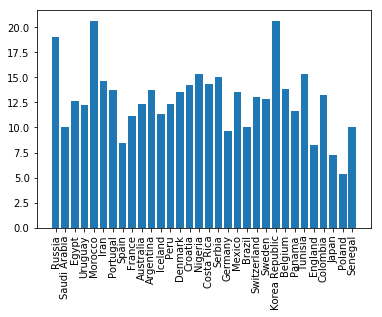

In [284]:
plt.bar(range(len(foul_avg)), list(foul_avg.values()), align='center')
plt.xticks(range(len(foul_avg)), list(foul_avg.keys()), rotation = 90)

#country's foul average per game


<BarContainer object of 2 artists>

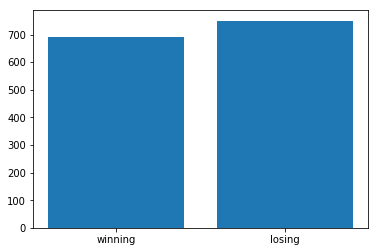

In [285]:
plt.bar(['winning', 'losing'],[winning_fouls_total, losing_fouls_total])
#total fouls

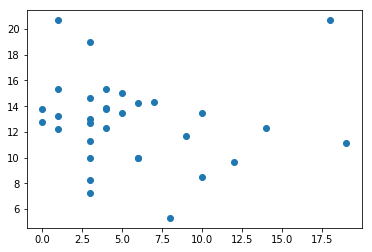

In [286]:
#games won vs avg fouls
plt.scatter(games_won, list(foul_avg.values()))

,a,b,c,d,e,f,g,h
matches,"[{'name': 1, 'type': 'group', 'home_team': 1, ...","[{'name': 3, 'type': 'group', 'home_team': 5, ...","[{'name': 5, 'type': 'group', 'home_team': 9, ...","[{'name': 7, 'type': 'group', 'home_team': 13,...","[{'name': 9, 'type': 'group', 'home_team': 17,...","[{'name': 11, 'type': 'group', 'home_team': 21...","[{'name': 13, 'type': 'group', 'home_team': 25...","[{'name': 15, 'type': 'group', 'home_team': 29..."
name,Group A,Group B,Group C,Group D,Group E,Group F,Group G,Group H
runnerup,1,5,12,13,18,22,28,32
winner,4,6,9,15,17,23,25,31


,matches
a,"[{'name': 1, 'type': 'group', 'home_team': 1, ..."
b,"[{'name': 3, 'type': 'group', 'home_team': 5, ..."
c,"[{'name': 5, 'type': 'group', 'home_team': 9, ..."
d,"[{'name': 7, 'type': 'group', 'home_team': 13,..."
e,"[{'name': 9, 'type': 'group', 'home_team': 17,..."
f,"[{'name': 11, 'type': 'group', 'home_team': 21..."
g,"[{'name': 13, 'type': 'group', 'home_team': 25..."
h,"[{'name': 15, 'type': 'group', 'home_team': 29..."


matches    [{'name': 1, 'type': 'group', 'home_team': 1, ...
Name: a, dtype: object